In [1]:
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
#To Load the Dataset
from google.colab import files
uploaded = files.upload()


Saving Project Management Dataset.csv to Project Management Dataset (1).csv


In [12]:
df=pd.read_csv("/content/Project Management Dataset.csv")
print(df.head()) #view the top five rows.

                Project Name  \
0                 Rhinestone   
1     A Triumph Of Softwares   
2              The Blue Bird   
3  Remembering Our Ancestors   
4                   Skyhawks   

                                 Project Description  \
0  Associations Now Is A Casual Game To Teach You...   
1  Is A Fully Managed Content Marketing Software ...   
2  Most Content Marketers Know The Golden Rule: Y...   
3  Utilize And Utilizes (Verb Form) The Open, Inc...   
4  Is A Solution For Founders Who Want To Win At ...   

                  Project Type  Project Manager Region           Department  \
0            INCOME GENERATION      Yael Wilcox  North           Admin & BI   
1            INCOME GENERATION  Brenda Chandler   West            eCommerce   
2            INCOME GENERATION    Nyasia Hunter  North            Warehouse   
3          PROCESS IMPROVEMENT  Brenda Chandler   East  Sales and Marketing   
4  WORKING CAPITAL IMPROVEMENT  Jaylyn Mckenzie   East            eCommerce

In [18]:
#To fetch Specific amount of rows from bottom
print(df.tail(20))



                  Project Name  \
79                  Java Dalia   
80                    Skill Up   
81  Excel And Elevate Training   
82                      Wombat   
83       The Social Experiment   
84              Box Of Crayons   
85          The Domain Of Work   
86             Impact Training   
87           An Evening Affair   
88            Social Geek Made   
89                      Sirius   
90                 Fast Coding   
91       Super Happy Fun Time!   
92            Software Chasers   
93        The Discovery Of Era   
94             Strive Training   
95                Debug Entity   
96                  Made By Me   
97                  Revolution   
98         7Th Annual Workshop   

                                  Project Description  \
79  Is A Software-As-A-Service Startup That Uses P...   
80  The Current Reality Of Content Marketing Is Th...   
81  We’Re A Content Marketing Software That Is Par...   
82  Is The Only Ai Platform That Uses Ai For Conte...   


to check the datatypes


In [16]:
print(df.dtypes)
#to check datatypes

Project Name           object
Project Description    object
Project Type           object
Project Manager        object
Region                 object
Department             object
 Project Cost          object
 Project Benefit       object
Complexity             object
Status                 object
Completion%            object
Phase                  object
Year                    int64
Month                   int64
Start Date             object
End Date               object
dtype: object


In [17]:
#Check Null Values Count Null Values and highlights any missing data.

print(df.isnull().sum())

Project Name           0
Project Description    0
Project Type           0
Project Manager        0
Region                 0
Department             0
 Project Cost          0
 Project Benefit       0
Complexity             0
Status                 0
Completion%            0
Phase                  0
Year                   0
Month                  0
Start Date             0
End Date               0
dtype: int64


In [19]:
#Provides summary statistics for numerical columns, offering insights into distribution
#central tendency and variability

print(df.describe())

              Year      Month
count    99.000000  99.000000
mean   2022.747475   7.151515
std       1.402210   3.211471
min    2021.000000   1.000000
25%    2022.000000   4.500000
50%    2022.000000   7.000000
75%    2024.000000  10.000000
max    2025.000000  12.000000


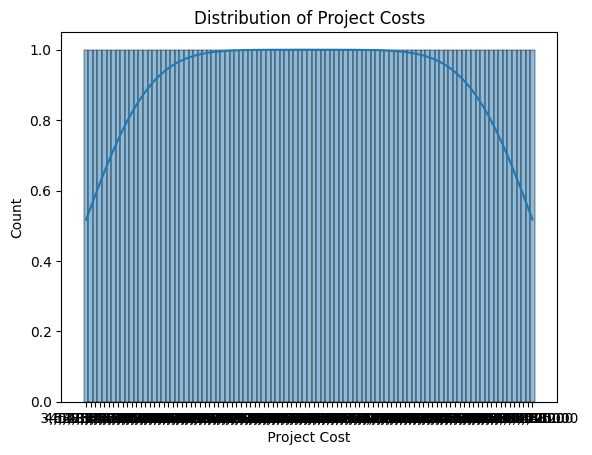

In [26]:
#Visualized distribution of project costs, identify skewnwss,outliers and the general cost range
sns.histplot(data=df,x=' Project Cost ',kde=True)
plt.title('Distribution of Project Costs')
plt.show()

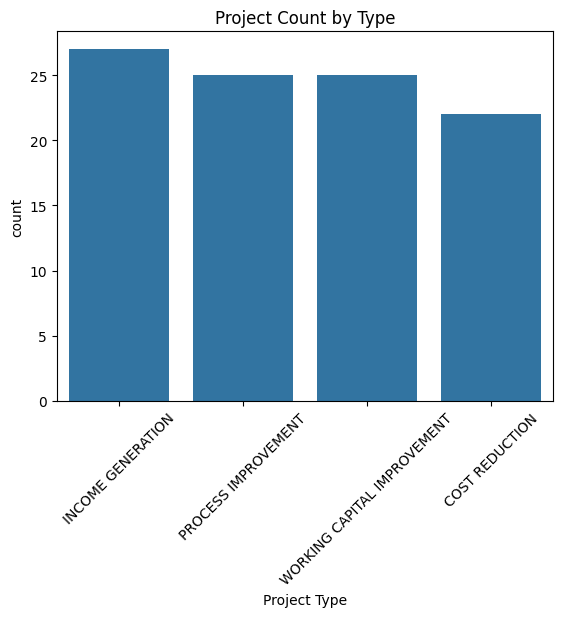

In [30]:
#Shows no of projects per type,highlights most common type.

sns.countplot(data=df,x='Project Type')
plt.xticks(rotation=45)
plt.title('Project Count by Type')
plt.show()

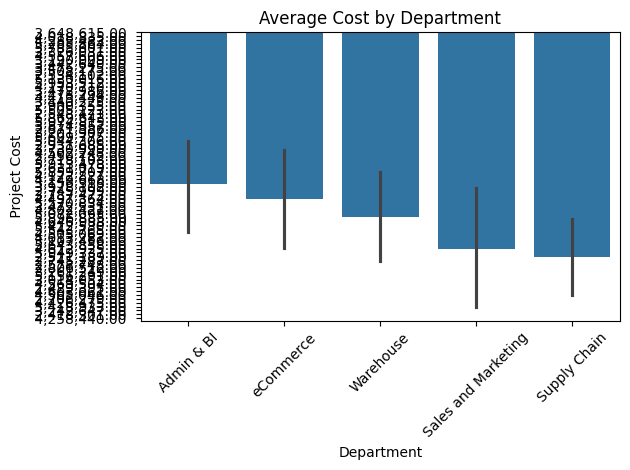

In [37]:
#Displays higher cost projects

sns.barplot(data=df,x='Department',y=' Project Cost ',estimator=np.mean)
plt.xticks(rotation=45)
plt.title('Average Cost by Department')
plt.tight_layout()
plt.show()

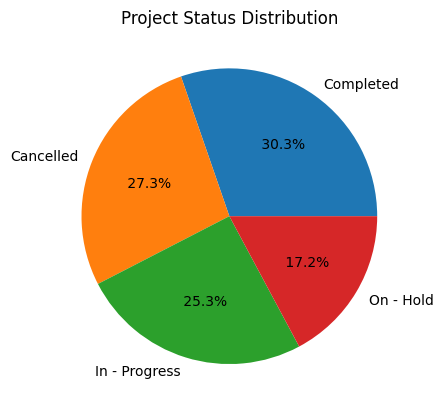

In [38]:
#Proportion of projects in different statuses such as completed, progress or delayed

plt.pie(df['Status'].value_counts(), labels=df['Status'].value_counts().index,
autopct='% 1.1f%%')

plt.title('Project Status Distribution')

plt.show()

In [39]:
#CORRELATION HEATMAP
# Highlights the correlation between numerical variables, identifying potential relationships or redundancies
# Throws error because it cannot correlate categorical values.
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()



ValueError: could not convert string to float: 'Rhinestone'

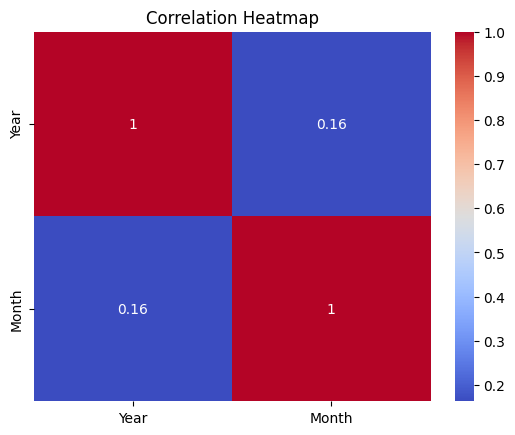

In [41]:
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()


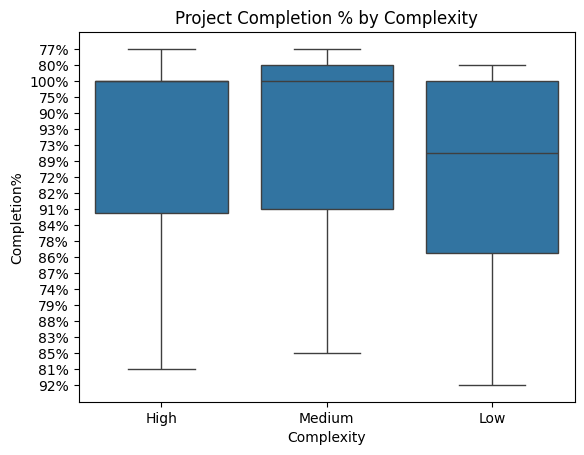

In [45]:
#PROJECT COMPLETION % BY COMPLEXITY
#Compares project completion percentages across different levels of complexity, checking if complexity affecls timely completion.

sns.boxplot(data=df, x='Complexity', y='Completion%', showfliers=False)
plt.title('Project Completion % by Complexity')
plt.show()



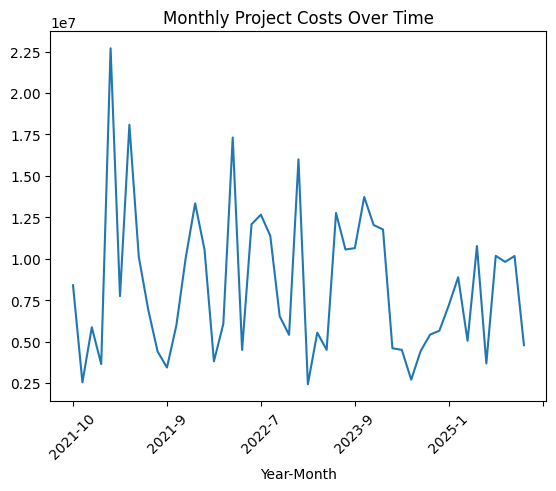

In [60]:
#TIME SERIES ANALYSIS OF PROJECT COSTS
#run below cells to reslove the error

df['Year-Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)
df.groupby('Year-Month')[' Project Cost '].sum().plot()
plt.title('Monthly Project Costs Over Time')

plt.xticks(rotation=45)
plt.show()

#Shows how total project costs vary over time, identifying trends or seasonal patterns.

In [54]:
df[' Project Cost '] = df[' Project Cost '].str.replace(' ', '')

In [56]:
df[' Project Cost '] = df[' Project Cost '].astype(str)

In [57]:
df[' Project Cost '] = df[' Project Cost '].str.replace(',', '')

In [58]:
df[' Project Cost '] = pd.to_numeric(df[' Project Cost '])

In [59]:
df[' Project Cost '].dtype

dtype('float64')

#Alternate way to resolve code

df[' Project Cost '] = df[' Project Cost '].str.replace(',', '').astype(float)

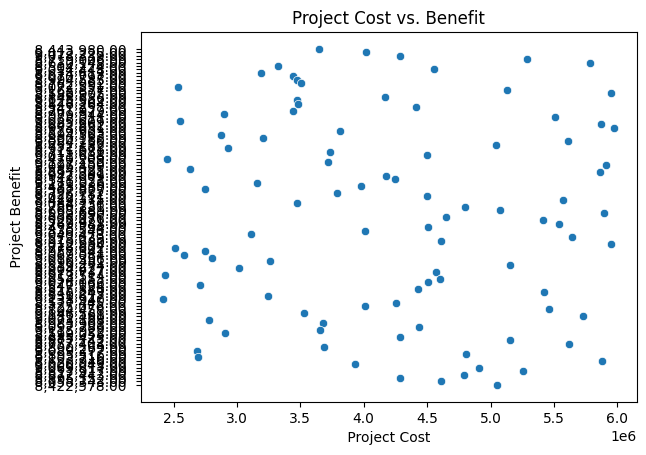

In [64]:
#SCATTER PLOT: COST VS. BENEFIT
#Investigates the relationship between project cost and benefit, to see if higher costs correlate with greater benefits.

sns.scatterplot(data=df, x=' Project Cost ', y=' Project Benefit ')
plt.title('Project Cost vs. Benefit')

plt.show()



KeyError: ' Project Cost '

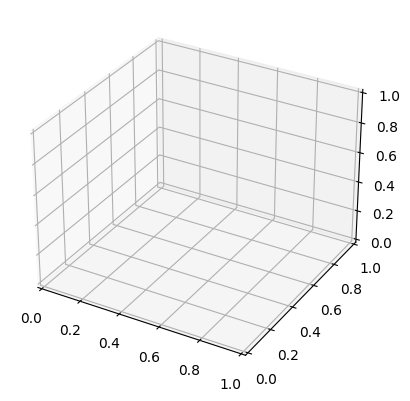

In [70]:
#3D CHART: COST, BENEFIT, AND COMPLEXITY

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[' Project Cost '], df[' Project Benefit '], df['Complexity'])
ax.set_xlabel(' Project Cost ')
ax.set_ylabel(' Project Benefit ')
ax.set_zlabel('Complexity')
plt.title('3D Chart of Cost, Benefit, and Complexity')
plt.show()

#Offers a three-dimensional view to explore the relationships between cost, benefit, and complexity simultaneously, providing a holistic view of project attributes.

In [67]:
df.columns = df.columns.str.strip()

In [82]:
df['Project Cost'] = df['Project Cost'].replace(',', '').astype(float)
df['Project Benefit'] = df['Project Benefit'].replace(',', '').astype(float)

In [77]:
print(df['Project Cost'].dtype)
print(df['Project Benefit'].dtype)

float64
object


In [79]:
df['Project Cost'] = df['Project Cost'].astype(str)
df['Project Benefit'] = df['Project Benefit'].astype(str)

In [80]:
df['Project Cost'] = pd.to_numeric(df['Project Cost'].str.replace(',', ''))
df['Project Benefit'] = pd.to_numeric(df['Project Benefit'].str.replace(',', ''))

In [87]:
import plotly.express as px

fig = px.scatter_3d(df, x='Project Cost', y='Project Benefit', z='Complexity',color='Project Type')
fig.update_layout(scene = dict(
                    xaxis = dict(title  = 'Project Cost'),
                    yaxis = dict(title  = 'Project Benefit'),
                    zaxis = dict(title  = 'Complexity')))
fig.show()

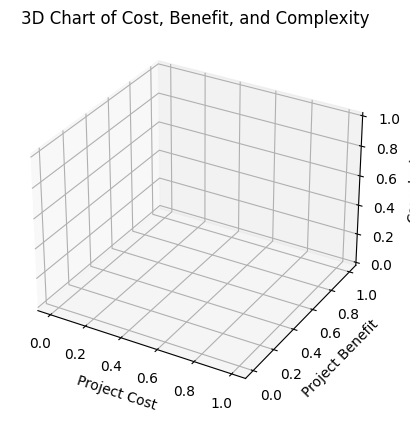

In [91]:
# Remove non-numeric characters and convert to float
#data[' Project Cost '] = data[' Project Cost '].str.replace(',', '').astype(float)
#data[' Project Benefit '] = data[' Project Benefit '].str.replace(',', '').astype(float)
complexity_mapping = {'low': 1, 'medium': 2, 'high': 3}
df['Complexity'] = df['Complexity'].map(complexity_mapping)
# Create the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Project Cost'], df['Project Benefit'], df['Complexity'])
ax.set_xlabel('Project Cost')
ax.set_ylabel('Project Benefit')
ax.set_zlabel('Complexity')
plt.title("3D Chart of Cost, Benefit, and Complexity")
plt.show()